# Linear Regression

In [100]:
# Import Pertinent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [101]:
# Import data
df = pd.read_csv('Ecommerce Customers.csv')

In [102]:
# Take a peek
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [103]:
# Get more information from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [104]:
# Get some descriptive statistics
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

<AxesSubplot:>

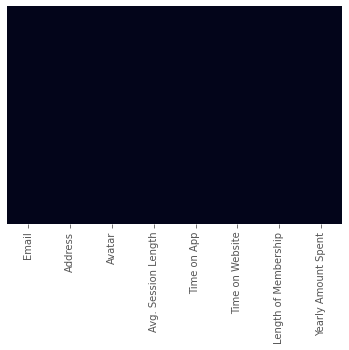

In [105]:
# Take a look at missing data if any
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [121]:
# Confirm missing values
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

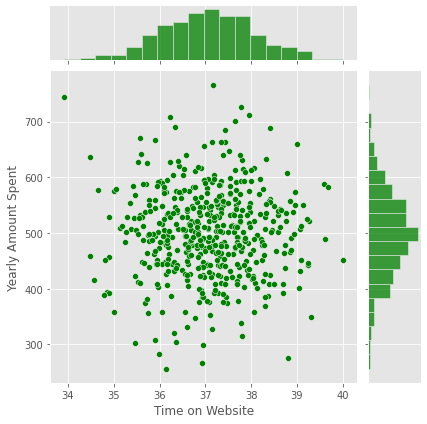

In [122]:
# Compare pertinent features
sns.jointplot(x='Time on Website',y='Yearly Amount Spent', data=df, color='green')

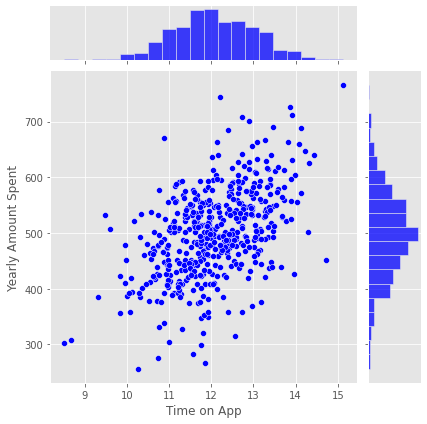

In [108]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent', data=df, color='blue')

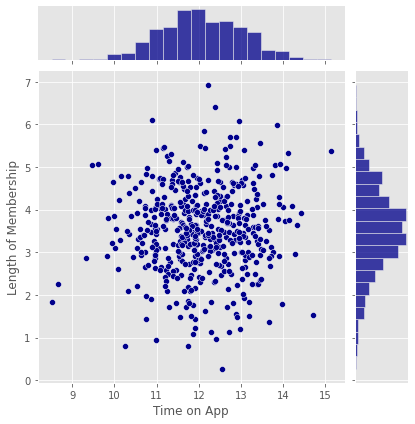

In [109]:
sns.jointplot(x='Time on App',y='Length of Membership', data=df, color='darkblue')

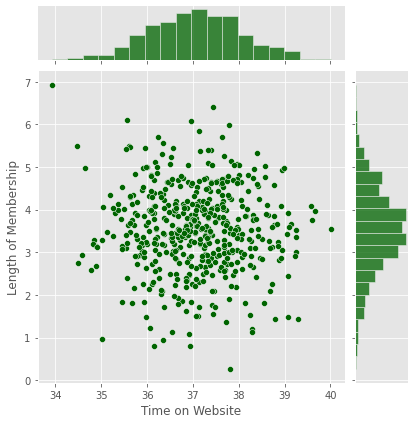

In [110]:
sns.jointplot(x='Time on Website',y='Length of Membership', data=df, color='darkgreen')

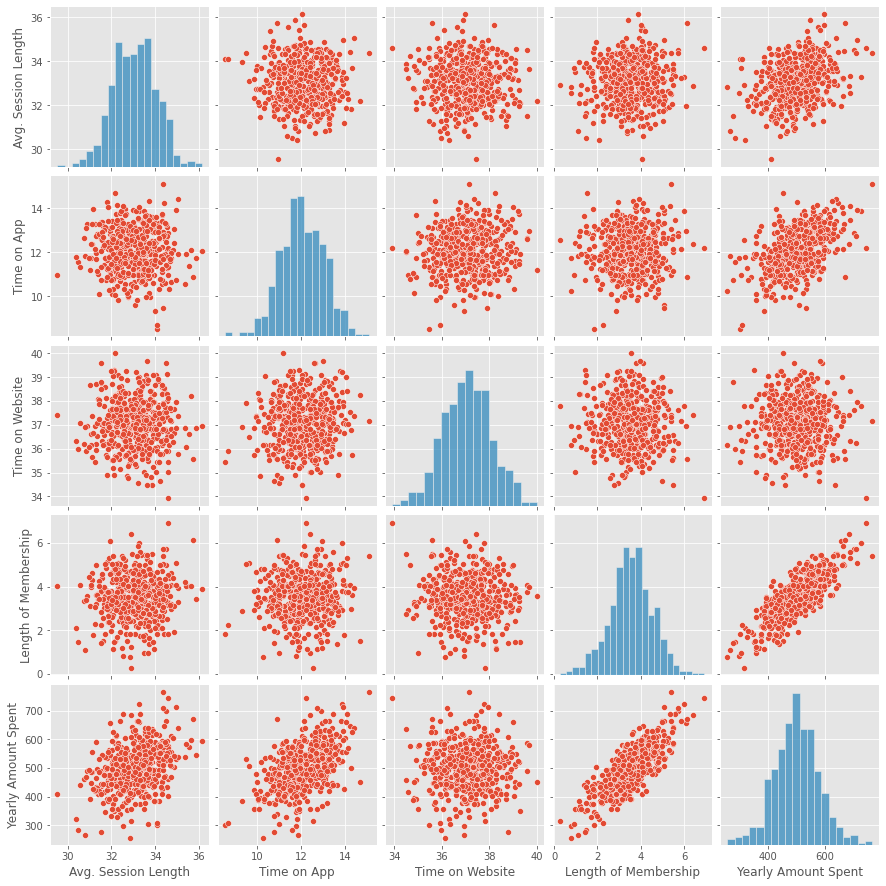

In [111]:
# There are only 500 entries in this data, we can use pairplot to see many iterations
sns.pairplot(df)

Based off visual graphs, it seems Yearly Amount Spent is most correlated with Length of Membership

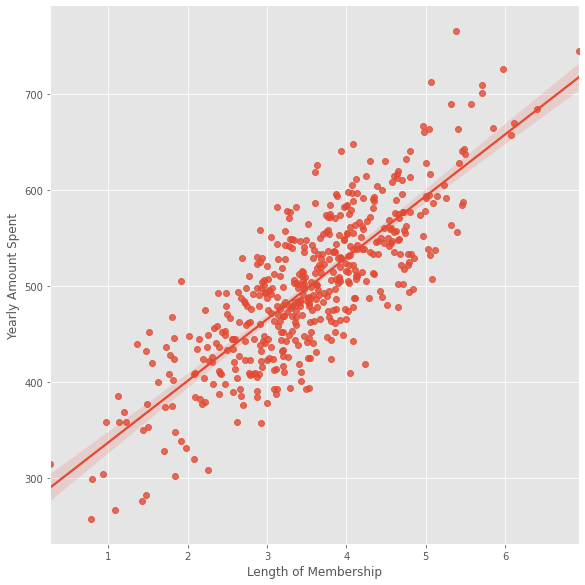

In [112]:
# Show these features on a lm plot
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df, height=8)

In [113]:
# Split data using pertinent columns and creating training and testing data
from sklearn.model_selection import train_test_split
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=13)

In [114]:
# Create Linear Regression Instance
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fit model using training data
lm.fit(X_train, y_train)

# Create predictions from model
predictions = lm.predict(X_test)

In [115]:
# See coefficients and show 
coeff = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficients'])
coeff

Coefficients
Avg. Session Length      25.688357
Time on App              38.723490
Time on Website           0.252743
Length of Membership     61.892265

Text(0, 0.5, 'Predictions')

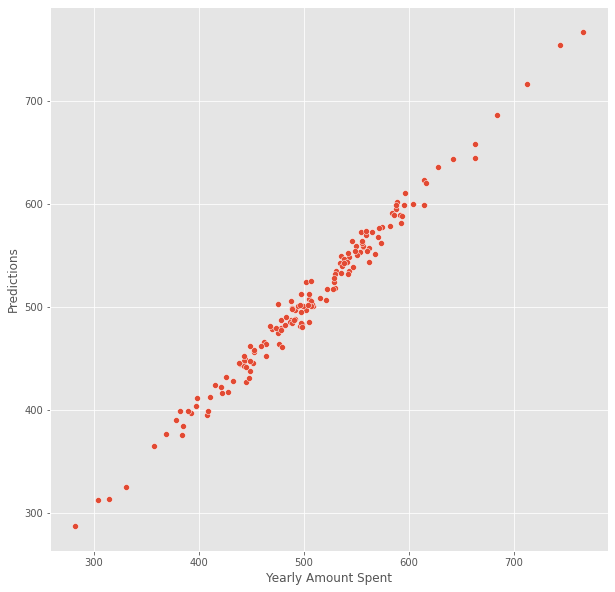

In [116]:
# Show predicted values vs. actual values
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')

Model is doing well, considering only 4 columns

In [117]:
# Get some metrics
from sklearn import metrics
print(f'MAE: {metrics.mean_absolute_error(y_test,predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test,predictions)}')
print(f'RMSE: {(metrics.mean_squared_error(y_test,predictions))**(1/2)}')
print(f'R^2: {metrics.explained_variance_score(y_test,predictions)}')

MAE: 7.541608060513323
MSE: 86.53101610979031
RMSE: 9.302204905816165
R^2: 0.9865327758159033


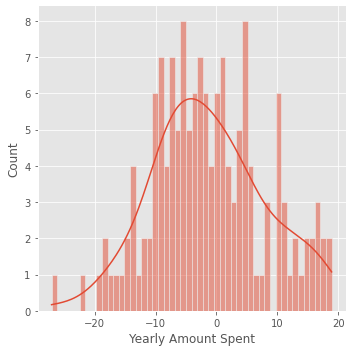

In [118]:
# Taking a deeper look into risiduals
sns.displot((y_test - predictions), bins=50, kde=True)

In [120]:
# You can see one unit of membership will yield a $62 dollar increase, therefore it would be best to focus this companies efforts in their membership
# Or work on website because it is lacking
# Or work on app to gain more capital
coeff

Coefficients
Avg. Session Length      25.688357
Time on App              38.723490
Time on Website           0.252743
Length of Membership     61.892265